In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

plt.rc('axes', labelsize=18)

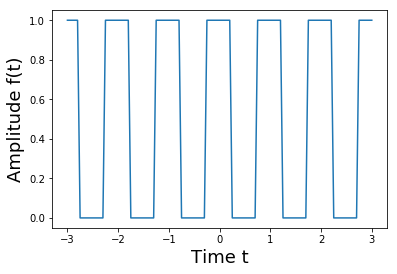

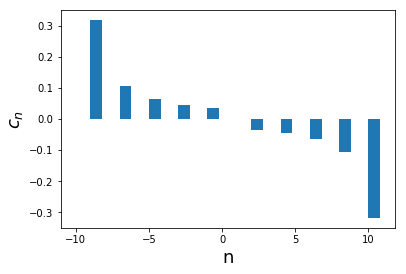

In [18]:
#Section 1

plot1 = np.zeros(121)
t = np.linspace(-3, 3, 121)

plot1[0:5] = 1
plot1[115:] = 1

for i in range(5):
    k = 15 + 20*i
    plot1[k:k+10] = 1
   
plt.figure(0)
plt.plot(t, plot1)
plt.xlabel('Time t')
plt.ylabel('Amplitude f(t)')
plt.savefig('Figure1.png')

n = np.linspace(-10,10,21)
c = np.zeros_like(n)

for i in range(10):
    c[2*i - 9] = 1 / (np.pi * (2*i - 9) )

plt.figure(1)
plt.bar(n, c, align='edge')
plt.xlabel('n')
plt.ylabel('$c_n$')
plt.savefig('Figure2.png')

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


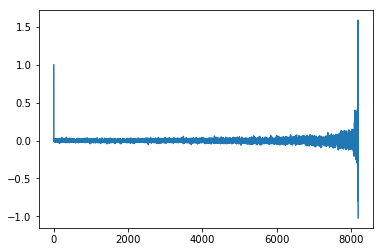

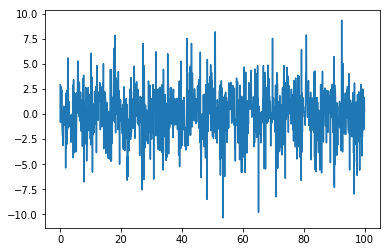

In [32]:
# ================== NOISE SECTION ==============================

# 3.1 Auto-correlation, PSD

def ac_problem(w_noise, N):
    w_mean = np.mean(w_noise)
    ac = np.zeros(N-1)

    num = np.zeros_like(w_noise)
    den = np.zeros_like(w_noise)
    for k in range(N):
        for t in range(1,N-k):
            num[k] += (w_noise[t] - w_mean) * (w_noise[t+k] - w_mean)
            den[k] += (w_noise[t] - w_mean)**2
    for k in range(N-1):    
        ac[k] = num[k] / den[k]

    k = np.linspace(1,N,N)
    plt.figure(0)
    plt.plot(k[:-1], ac)

    omega = np.linspace(0,100,1000)
    s = np.zeros_like(omega)

    for i, val in enumerate(omega):
        s[i] = np.sum( ac * np.exp( -1j * val * k[:-1]))
    plt.figure(1)
    plt.plot(omega, s)

num = int(0)
number = 8192
np.random.seed(8675309)
w_noise = np.random.rand(number)
ac_problem(w_noise, N=number)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


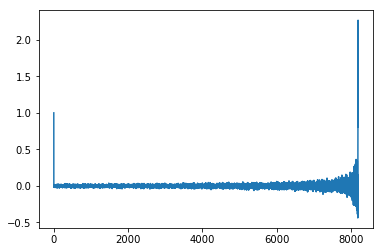

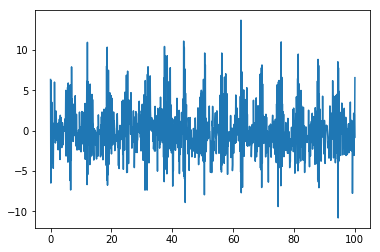

In [33]:
w_noise = np.random.randn(N)
ac_problem(w_noise, N=number)

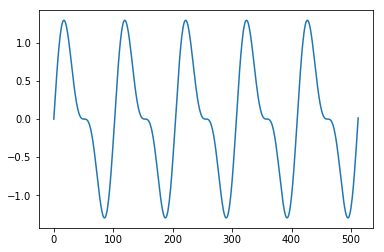

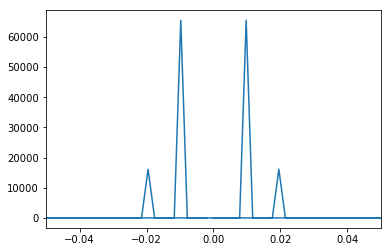

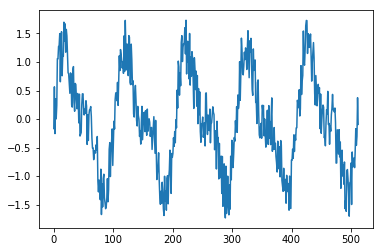

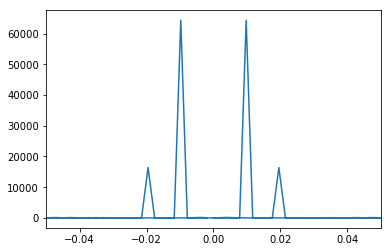

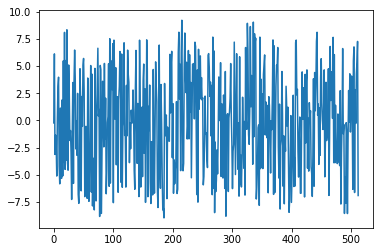

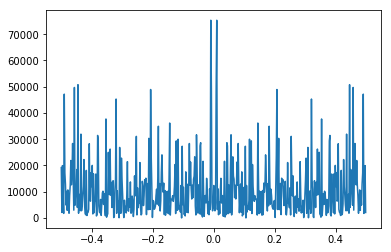

In [65]:
#Spectral Subtraction
f0 = 440
dt = 0.0000222
N = 512

t = np.linspace(0, N*dt, N)
i = np.linspace(0, N, N)

x = np.sin(2*np.pi*f0*t) + 0.5*np.sin(2*np.pi*(2*f0)*t)

plt.figure(0)
plt.plot(i, x)

X = np.abs(np.fft.fft(x))**2
Xfreq = np.fft.fftfreq(len(x))

plt.figure(1)
plt.plot(Xfreq, X)
plt.xlim(-0.05,0.05)

#Now with random noise
x += np.random.uniform(-0.5, 0.5, N)

plt.figure(2)
plt.plot(i, x)

X = np.abs(np.fft.fft(x))**2
Xfreq = np.fft.fftfreq(len(x))

plt.figure(3)
plt.plot(Xfreq, X)
plt.xlim(-0.05,0.05)

r = 8.

x += np.random.uniform(-r, r, N)

plt.figure(4)
plt.plot(i, x)

X = np.abs(np.fft.fft(x))**2
Xfreq = np.fft.fftfreq(len(x))

X = np.concatenate((X[256:], X[:256]),axis=0)
#Xfreq = np.concatenate((Xfreq[:256], Xfreq[:256]), axis=0)

Xfreq = np.linspace(-0.5,0.49804688, 512)

plt.figure(5)
plt.plot(Xfreq, X)
#plt.xlim(-0.05,0.05)

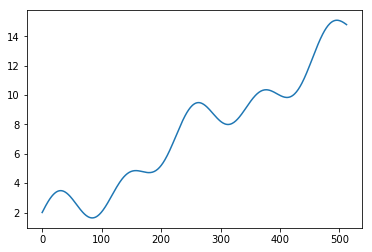

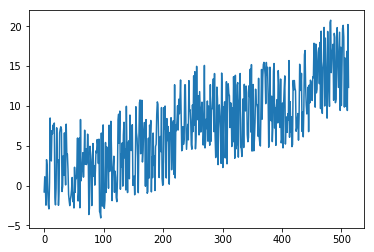

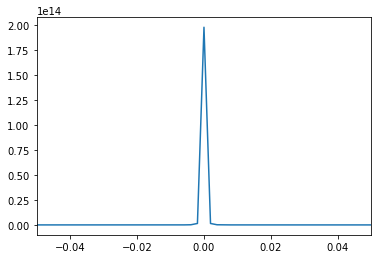

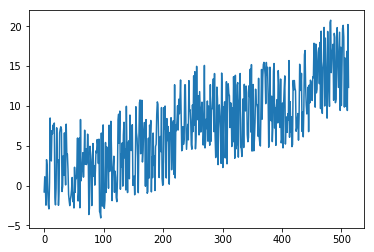

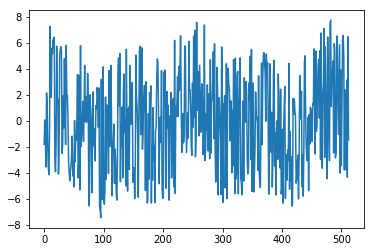

In [83]:
#Noise and trends
f0 = 9./512.
f1 = 4./512.

g = 1. + 0.025*i
x = np.sin(np.pi*f0*i) + np.cos(np.pi*f1*i) + g

plt.figure(0)
plt.plot(i,x)

x += np.random.uniform(-6,6,N)

plt.figure(1)
plt.plot(i,x)

X = np.abs(np.fft.fft(x))**2
X = np.concatenate((X[256:], X[:256]),axis=0)
Xfreq = np.linspace(-0.5,0.49804688, 512)

plt.figure(2)
plt.plot(Xfreq, X**2)
plt.xlim(-0.05,0.05)

X = X * (X > 180.).astype(int)

x_idft = np.fft.fft(X)

plt.figure(3)
plt.plot(i,x)

x -= g
X = np.abs(np.fft.fft(x))**2
X = X * (X > 9.).astype(int)
x_idft = np.fft.fft(X)
x_idft += g

plt.figure(4)
plt.plot(i,x)

[ 0.99051776+2.06692133j  0.98961030+2.06439339j  0.98870314+2.06187208j
 ...,  0.99324187+2.07454517j  0.99233355+2.0719972j
  0.99142551+2.06945592j]


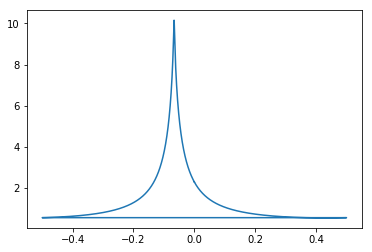

In [12]:
#Heat equation
x0=2./3.
sigma = 0.03

k = np.linspace(0,1000,10000)

t_hat = (1. /k**2) * np.exp(-sigma**2 * k**2 / 2 - 2 * np.pi * 1j * k *x0)

t = np.fft.fft(t_hat)
x = np.fft.fftfreq(len(t_hat))

print(t)

plt.plot(x, np.abs(t))

AttributeError: 'complex' object has no attribute 'dtype'